## Специализированные программные библиотеки для анализа данных.

### Укажите ФИО и группу


Обершт София Дмитриевна гр.23153

In [233]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
import os

### Импортируем необходимые модули

In [ ]:
import numpy as np
import datetime
import scipy, datetime
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Ваши наборы данных - это разминочный датасет с ирисами и сводка по эпидемиологической обстановке в России с прошлого занятия. В этом домашнем задании 5 пунктов, постарайтесь выполнить их все. Всего за эту домашку можно получить 10 баллов.

### 1. Базовые знания о данных (2 балла)

У вас есть датасет с данными об ирисах. Посмотрите на ваши данные (не забываем про _describe_ и _info_), выведите статистику для них. Изобразите на графике распределение значений параметров вашего набора.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X = pd.DataFrame(iris.data.T, index = iris.feature_names).T

In [237]:
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [238]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [239]:
print ('Dataset shape: %i rows, %i columns'%X.shape)
X.describe()

Dataset shape: 150 rows, 4 columns


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [240]:
X['iris type'] = y

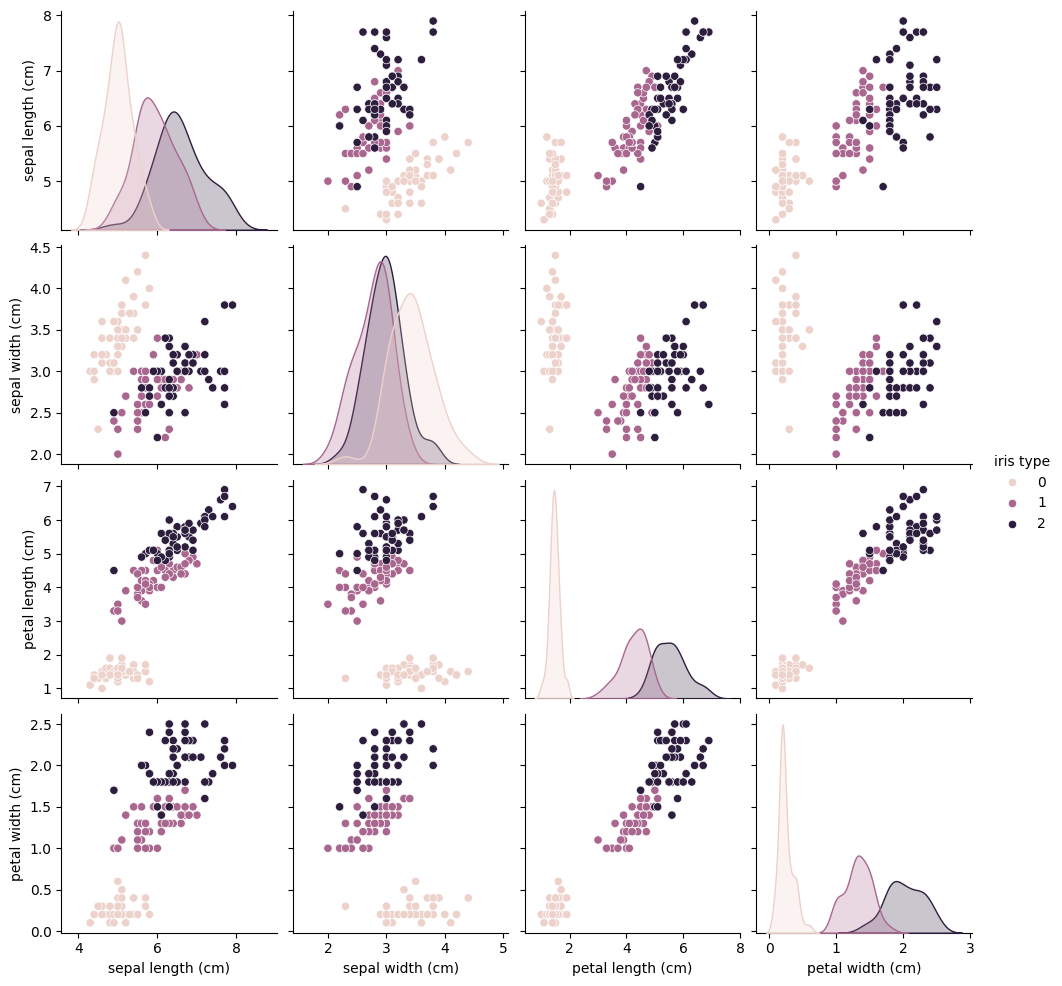

In [241]:
sns.pairplot(X, hue = 'iris type', vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

array([[<Axes: title={'center': 'sepal length (cm)'}, ylabel='Density'>,
        <Axes: title={'center': 'sepal width (cm)'}, ylabel='Density'>,
        <Axes: title={'center': 'petal length (cm)'}, ylabel='Density'>,
        <Axes: title={'center': 'petal width (cm)'}, ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

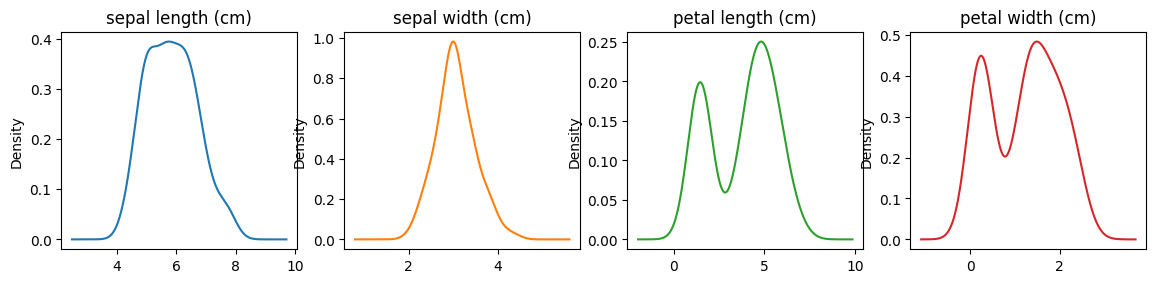

In [242]:
X.iloc[:,:4].plot(kind='kde', subplots=True, layout=(4,4), sharex=False,
                         sharey=False, figsize=[14,13], legend = False,
                         title = X.columns.values.tolist()[:4])

### 2. Визуализация результатов PCA (2 балла)

Проведите PCA анализ для ваших данных.
1. Постройте диаграмму рассеяния в координатах PC1, PC2. Цвет точек должен соответствовать целевой переменной y, где её значения - один из 3 видов ирисов. *(1 балл)*
2. Постройте биплот, отражающий влияние исходных параметров на PC1 и PC2. *(1 балл)*

In [243]:
from sklearn import preprocessing

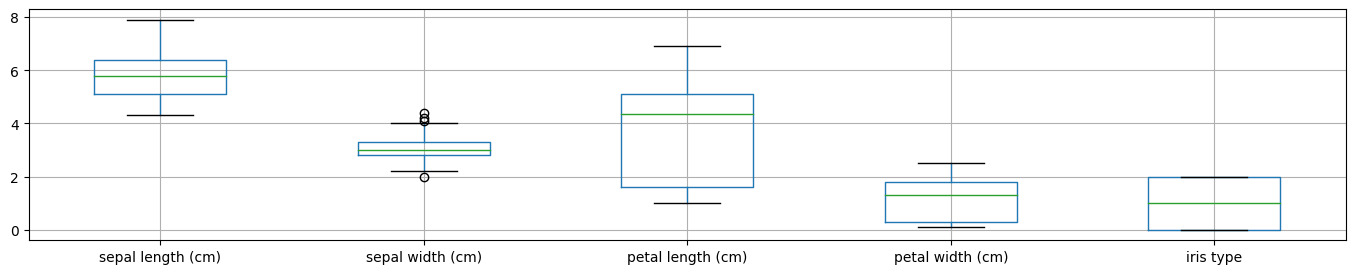

In [244]:
g = X.boxplot(figsize = (17,3))

In [245]:
std = preprocessing.StandardScaler()
X.iloc[:,:4] = std.fit_transform(X.iloc[:,:4])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [246]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
iris type,0.782561,-0.426658,0.949035,0.956547,1.000000


In [247]:
X.drop('iris type', axis= 1 , inplace= True )
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


<Axes: xlabel='PC1', ylabel='PC2'>

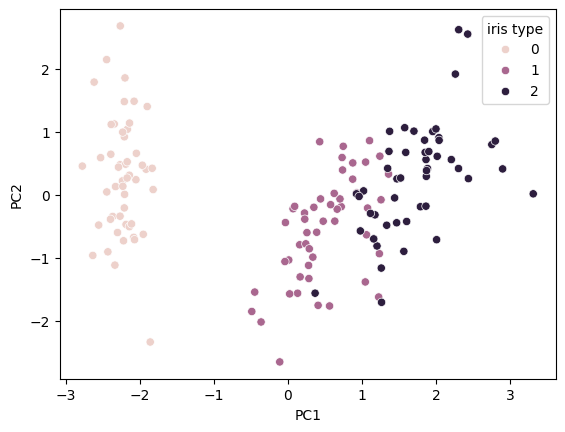

In [248]:
pca = PCA(n_components = 2).fit(X)
print(pca.components_)
pca_tr = pd.DataFrame(pca.transform(X), columns = ['PC1', 'PC2'])
pca_tr['iris type'] = y
sns.scatterplot(x = 'PC1', y = 'PC2', data = pca_tr, hue = 'iris type')

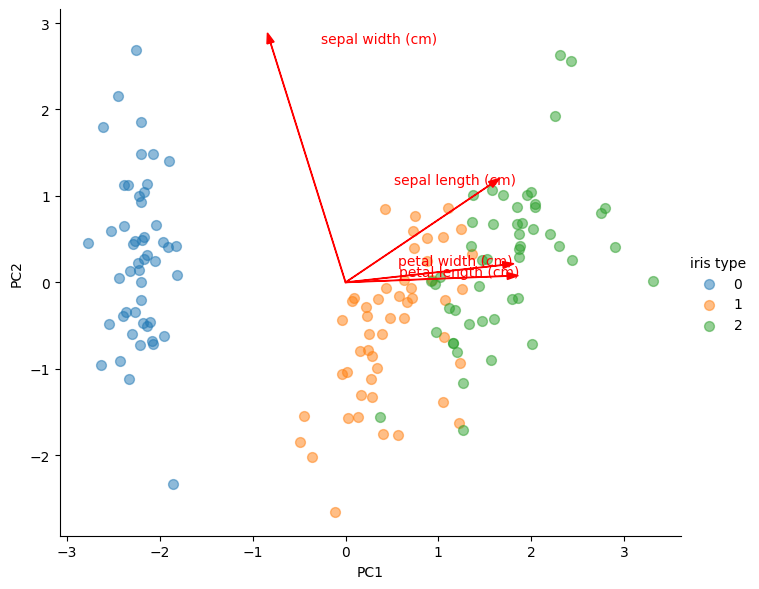

In [249]:
sns.lmplot(x = 'PC1', y = 'PC2', data = pca_tr, fit_reg = False,
           hue = 'iris type', height = 6, aspect = 7/6, scatter_kws={"s": 50, 'alpha':0.5})
xvector = pca.components_[0] #max varience
yvector = pca.components_[1]

for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*3, yvector[i]*3,
              color='r', width=0.005, head_width=0.08)
    plt.text(xvector[i], yvector[i]*3,
             list(iris.feature_names)[i], color='r')

##### Набор данных -- уже не столь свежая сводка по эпидемиологической обстановке в России
### 3. Аккумулирование информации по неделям (2 балла)

Для выполнения этого задания вам придется вернуться к датасету ncov_ru_j, с которым вы работали в прошлом домашнем задании.

Определите прирост числа заражений в процентах за неделю (как вы это сделаете - вопрос, _подсказка:_ суммируем число новых заражений за неделю, чтобы получить число новых случаев за неделю, а потом &mdash; рассчитываем прирост), если не получится &mdash; просто постройте график для среднего числа активных случаев на 100 тыс. населения со скользящим окном в 7 дней.
Пример, как посчитать, был на предыдущих занятиях &mdash; ближе к концу в ноутбуке №2.
График постройте для следующих регионов:

`
regs = ['Забайкальский край', 'Ингушетия', 'Магаданская обл.', 'Москва', 'Мурманская обл.',
        'Новосибирская обл.', 'Омская обл.', 'Санкт-Петербург', 'Татарстан', 'Чечня']
`

Hа самом деле, смысла в выборе именно этих регионов нет &mdash; можете выбрать другие, какие вам нравятся (просто если мы сразу отрисуем все регионы на одном графике, он получится нечитаемым).

In [ ]:
ncov_ru_de = pd.read_csv('/content/drive/MyDrive/COVID_RU_Ya_descr.csv')
ncov_ru_stat = pd.read_csv('/content/drive/MyDrive/COVID_RU_Ya_stat_2022.csv')
ncov_ru_de = ncov_ru_de.drop(columns=['Unnamed: 0'], axis = 1)
ncov_ru_stat = ncov_ru_stat.drop(columns=['Unnamed: 0'], axis = 1)

ncov_ru_j = ncov_ru_stat.join(ncov_ru_de.set_index('Регион'), on = 'Регион', validate='m:1')

In [251]:
ncov_ru_j['Дата'] = ncov_ru_j['Дата'].astype('datetime64[ns]')
ncov_ru_j.set_index(['Регион','Дата'], inplace = True)

ncov_ru_j['Активных'] = ncov_ru_j['Заражений'] - ncov_ru_j['Смертей'] - ncov_ru_j['Выздоровлений']
ncov_ru_j['Активных на 100К населения'] = ncov_ru_j['Активных']*100000/ncov_ru_j['Регион население']
ncov_ru_j['Заражений на 100К населения'] = ncov_ru_j['Заражений']*100000/ncov_ru_j['Регион население']
ncov_ru_j['Смертей на 100К населения'] = ncov_ru_j['Смертей']*100000/ncov_ru_j['Регион население']
ncov_ru_j['Заражений за день на 100К населения'] = ncov_ru_j['Заражений за день']*100000/ncov_ru_j['Регион население']
ncov_ru_j['Смертей за день на 100К населения'] = ncov_ru_j['Смертей за день']*100000/ncov_ru_j['Регион население']

<ipython-input-251-758f4df409ee>:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ncov_ru_j['Дата'] = ncov_ru_j['Дата'].astype('datetime64[ns]')


In [252]:
ncov_ru_j.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 79458 entries, ('Пермский край', Timestamp('2020-10-20 00:00:00')) to ('Самарская обл.', Timestamp('2021-04-01 00:00:00'))
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Заражений                            79458 non-null  int64  
 1   Выздоровлений                        79458 non-null  int64  
 2   Смертей                              79458 non-null  int64  
 3   Смертей за день                      79458 non-null  int64  
 4   Заражений за день                    79458 non-null  int64  
 5   Выздоровлений за день                79458 non-null  int64  
 6   Летальность, %                       78529 non-null  float64
 7   ФО                                   79458 non-null  object 
 8   Регион название                      79458 non-null  object 
 9   Регион население                     79458 non-null  int64  
 1

In [269]:
ncov_ru_j.sort_index(level = 'Регион')

Заражений  Выздоровлений  Смертей  \
Регион           Дата                                            
Адыгея           2020-03-12          0              0        0   
                 2020-03-13          0              0        0   
                 2020-03-14          0              0        0   
                 2020-03-15          0              0        0   
                 2020-03-16          0              0        0   
...                                ...            ...      ...   
Ярославская обл. 2022-09-28     176325         166717     2832   
                 2022-09-29     176672         166915     2834   
                 2022-09-30     177022         167044     2836   
                 2022-10-01     177378         167475     2837   
                 2022-10-02     177737         168077     2840   

                             Смертей за день  Заражений за день  \
Регион           Дата                                             
Адыгея           2020-03-12                0                  0   
                 2020-03-13                0                  0   
                 2020-03-14                0                  0   
                 2020-03-15                0                  0   
                 2020-03-16                0                  0   
...                                      ...                ...   
Ярославская обл. 2022-09-28                0                346   
                 2022-09-29                2                347   
                 2022-09-30                2                350   
                 2022-10-01                1                356   
                 2022-10-02                3                359   

                             Выздоровлений за день  Летальность, %  \
Регион           Дата                                                
Адыгея           2020-03-12                      0             NaN   
                 2020-03-13                      0             NaN   
                 2020-03-14                      0             NaN   
                 2020-03-15                      0             NaN   
                 2020-03-16                      0             NaN   
...                                            ...             ...   
Ярославская обл. 2022-09-28                    136            1.61   
                 2022-09-29                    198            1.60   
                 2022-09-30                    129            1.60   
                 2022-10-01                    431            1.60   
                 2022-10-02                    602            1.60   

                                                        ФО  \
Регион           Дата                                        
Адыгея           2020-03-12        Южный федеральный округ   
                 2020-03-13        Южный федеральный округ   
                 2020-03-14        Южный федеральный округ   
                 2020-03-15        Южный федеральный округ   
                 2020-03-16        Южный федеральный округ   
...                                                    ...   
Ярославская обл. 2022-09-28  Центральный федеральный округ   
                 2022-09-29  Центральный федеральный округ   
                 2022-09-30  Центральный федеральный округ   
                 2022-10-01  Центральный федеральный округ   
                 2022-10-02  Центральный федеральный округ   

                                 Регион название  Регион население  Активных  \
Регион           Дата                                                          
Адыгея           2020-03-12    Республика Адыгея            453376         0   
                 2020-03-13    Республика Адыгея            453376         0   
                 2020-03-14    Республика Адыгея            453376         0   
                 2020-03-15    Республика Адыгея            453376         0   
                 2020-03-16    Республика Адыгея            453376         0   
...                 

Прирост[%] = (Стало * 100 / Было) - 100

In [265]:
regs = ['Забайкальский край', 'Ингушетия', 'Магаданская обл.', 'Москва', 'Мурманская обл.',
        'Новосибирская обл.', 'Омская обл.', 'Санкт-Петербург', 'Татарстан', 'Чечня']

In [266]:
ncov_week = ncov_ru_j.loc[regs]['Заражений за день'].rolling(7, step = 7).sum()
ncov_week['Заражений'] = ncov_ru_j.loc[regs]['Заражений'].rolling(7, step = 7)
ncov_week.head()

Регион              Дата      
Забайкальский край  2021-12-07       NaN
                    2022-08-03     714.0
                    2020-10-25    1505.0
                    2021-01-20     831.0
                    2021-09-18    1416.0
Name: Заражений за день, dtype: object

### 4. Динамика прироста числа заражений (3 балла)

1. Постройте график изменения прироста числа заражений начиная с сентября 2021 года с помощью sns.lineplot(). Что произойдёт, если вы не введёте hue? Постройте и такой график. *(1 балл)*
2. Выведите оба графика в одной фигуре - в plt.subplots нужно указать число строк с помощью параметра nrows, однако, убедитесь, что получившийся график будет читаемым и различимым. *(выполните сразу оба графика в plt.subplots, отключите легенду, если она будет мешать, 2 балла)*

### 5. Интерактивные графики (1 балл)

Постройте график №1 из предыдущей клетки с помощью bokeh, holoviews или plotly.

Домашнее задание сдаем в виде ноутбука *.ipynb -- можно расшарить ноутбук в Colab'е.  
Обязательно указываем ФИО  
Вопросы категорически приветствуются.